# Lab 2

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split

## Load data

In [2]:
spotify_song_df = pd.read_csv("data/Spotify_Song_Attributes.csv")

In [3]:
spotify_song_df.dtypes

trackName            object
artistName           object
msPlayed              int64
genre                object
danceability        float64
energy              float64
key                 float64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
type                 object
id                   object
uri                  object
track_href           object
analysis_url         object
duration_ms         float64
time_signature      float64
dtype: object

In [4]:
spotify_song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   trackName         10080 non-null  object 
 1   artistName        10080 non-null  object 
 2   msPlayed          10080 non-null  int64  
 3   genre             8580 non-null   object 
 4   danceability      9530 non-null   float64
 5   energy            9530 non-null   float64
 6   key               9530 non-null   float64
 7   loudness          9530 non-null   float64
 8   mode              9530 non-null   float64
 9   speechiness       9530 non-null   float64
 10  acousticness      9530 non-null   float64
 11  instrumentalness  9530 non-null   float64
 12  liveness          9530 non-null   float64
 13  valence           9530 non-null   float64
 14  tempo             9530 non-null   float64
 15  type              9530 non-null   object 
 16  id                9530 non-null   object

## Data Wrangling

In [5]:
Z = spotify_song_df["energy"].to_numpy()
Z_mean = np.nanmean(Z)
Z_shifted = Z - Z_mean

Y = spotify_song_df["loudness"].to_numpy()
Y_mean = np.nanmean(Y)
Y_shifted = Y - Y_mean

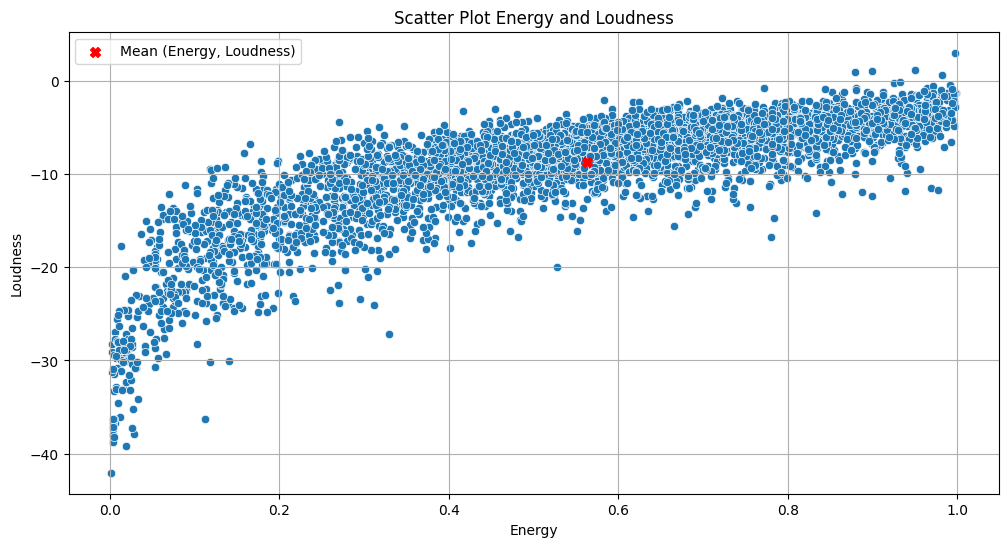

In [6]:
plt.figure(figsize=(12, 6), dpi=100)
sns.scatterplot(x=Z, y=Y)
plt.title("Scatter Plot Energy and Loudness")
plt.scatter(
    Z_mean, Y_mean, color="red", s=50, marker="X", label="Mean (Energy, Loudness)"
)
plt.xlabel("Energy")
plt.ylabel("Loudness")
plt.legend()
plt.grid(True)

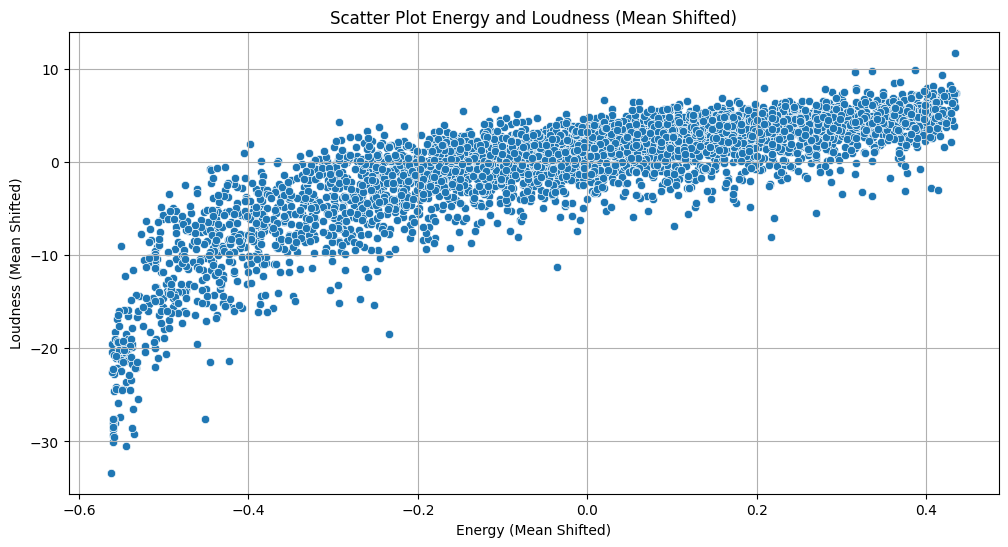

In [7]:
plt.figure(figsize=(12, 6), dpi=100)
sns.scatterplot(x=Z_shifted, y=Y_shifted)
plt.title("Scatter Plot Energy and Loudness (Mean Shifted)")
plt.xlabel("Energy (Mean Shifted)")
plt.ylabel("Loudness (Mean Shifted)")
plt.grid(True)

## LR

### `Loudness ~ Energy` With Shifting

In [8]:
energy_loudness_subset_df = spotify_song_df[["energy", "loudness"]].dropna()

In [9]:
energy_loudness_subset_df["energy_shifted"] = (
    energy_loudness_subset_df["energy"] - energy_loudness_subset_df["energy"].mean()
)
energy_loudness_subset_df["loudness_shifted"] = (
    energy_loudness_subset_df["loudness"] - energy_loudness_subset_df["loudness"].mean()
)

In [10]:
res_shifted = stats.linregress(
    x=energy_loudness_subset_df["energy_shifted"],
    y=energy_loudness_subset_df["loudness_shifted"],
)
print(res_shifted.intercept, res_shifted.slope)

-5.655568985527149e-16 17.721769008884962


### `Loudness ~ Energy` Without Shifting

In [11]:
res_not_shifted = stats.linregress(
    x=energy_loudness_subset_df["energy"],
    y=energy_loudness_subset_df["loudness"],
)
print(res_not_shifted.intercept, res_not_shifted.slope)

-18.671721001285412 17.721769008884962


* The slope is the same after not shifting the mean.
* But the intercepts are different. The shifted one has an intercept close to zero.

### `tempo ~ acousticness` With Shifting

In [12]:
acousticness_tempo_df = spotify_song_df[["acousticness", "tempo"]].dropna()
acousticness_tempo_df["acousticness_shifted"] = (
    acousticness_tempo_df["acousticness"] - acousticness_tempo_df["acousticness"].mean()
)
acousticness_tempo_df["tempo_shifted"] = (
    acousticness_tempo_df["tempo"] - acousticness_tempo_df["tempo"].mean()
)

In [13]:
res_shifted = stats.linregress(
    x=acousticness_tempo_df["acousticness_shifted"],
    y=acousticness_tempo_df["tempo_shifted"],
)
print(res_shifted.intercept, res_shifted.slope)

3.3899827170412867e-15 -14.722846159498355


### `tempo ~ acousticness` Without Shifting

In [14]:
res_shifted = stats.linregress(
    x=acousticness_tempo_df["acousticness"],
    y=acousticness_tempo_df["tempo"],
)
print(res_shifted.intercept, res_shifted.slope)

124.71774239123084 -14.72284615949836


* Similarly, here, the slopes are the same but the intercepts are different.
* The mean shifted one has an intercept closer to zero.

## Splitting Data

In [15]:
Z_train, Z_test, Y_train, Y_test = train_test_split(
    energy_loudness_subset_df["energy"],
    energy_loudness_subset_df["loudness"],
    train_size=0.33,
    random_state=49,
)

In [16]:
res = stats.linregress(
    x=Z_train,
    y=Y_train,
)
print(res.intercept, res.slope)

-18.565020658969683 17.629986971480463


Splitting the data didn't change the result as the distribution didn't change.

In [17]:
Y_pred = res.slope * Z_test + res.intercept

MSPE:

In [18]:
np.sum((Y_pred - Y_test) ** 2) / Y_pred.shape[0]

np.float64(10.713404947307493)